In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxr
from datetime import datetime, date
import json
from xgrads import open_CtlDataset
import geopandas as gpd
import requests
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import folium 
%matplotlib inline

In [2]:
# Choose a domain
domain = 'YUKO'

# Path to the SnowModel folder
SMpath = '/nfs/attic/dfh/2020_NPRB/domain_'+domain+'/snowmodel2023_cfsv2/'
# stream gage data 
gagepath = '/nfs/attic/dfh/2020_NPRB/data/stream_gage/'+domain+'/'
# ET data
etpath = '/nfs/attic/dfh/2020_NPRB/data/modis_ET/'+domain+'/'
# datapath
datapath = '/nfs/attic/dfh/2020_NPRB/data/SMinputs/'+domain+'/'
# prec ctl file
ctlFilePREC = SMpath+'ctl_files/wo_assim/prec.ctl'

#path to NPRB domains
domains_resp = requests.get("https://raw.githubusercontent.com/NPRB/02_preprocess_python/main/NPRB_domains.json")
domains = domains_resp.json()

# DATES
st_dt = '2011-10-01'
ed_dt = '2018-09-30'

In [3]:
# # open modified et file
# ctlFile = SMpath+'ctl_files/wo_assim/etx.ctl'

# et = open_CtlDataset(ctlFile)
# et

In [4]:
# # load ET data 
# # historical ET data - domain
# EThist_path = '/nfs/attic/dfh/2020_NPRB/data/climate_na_et/Normal_1991_2020_monthly/'+domain+'/historic_daily_et.nc'
# climatena = xr.open_dataset(EThist_path)
# #convert mm to m 
# et_m = climatena.et/1000
# # set all pixels to 0 where it is undefined in SM
# climatena['et_m'] = et_m
# climatena

In [5]:
# load station discharge data
path=gagepath+domain+'_discharge_cfs_'+st_dt+'_'+ed_dt+'.csv'
Q = pd.read_csv(path,parse_dates=['datetimeUTC'],infer_datetime_format=True,index_col='datetimeUTC')
Q

,USGS:15348000:00060:00003,USGS:15356000:00060:00003,USGS:15452100:00060:00003,USGS:15453500:00060:00003,USGS:15484000:00060:00003,USGS:15493400:00060:00003,USGS:15493700:00060:00003,USGS:15514000:00060:00003,USGS:15515500:00060:00003,USGS:15565447:00060:00003
datetimeUTC,,,,,,,,,,
2011-10-01 00:00:00+00:00,2990.0,109000.0,1450.0,159000.0,2420.0,1450.0,1600.0,1980.0,22900.0,323000.0
2011-10-02 00:00:00+00:00,2800.0,107000.0,1390.0,157000.0,2340.0,1410.0,1550.0,1930.0,22400.0,320000.0
2011-10-03 00:00:00+00:00,2700.0,105000.0,1320.0,155000.0,2280.0,1380.0,1510.0,1890.0,22000.0,317000.0
2011-10-04 00:00:00+00:00,2440.0,103000.0,1270.0,152000.0,2230.0,1350.0,1470.0,1840.0,21700.0,314000.0
2011-10-05 00:00:00+00:00,2050.0,101000.0,1200.0,149000.0,2180.0,1300.0,1430.0,1800.0,21400.0,310000.0
...,...,...,...,...,...,...,...,...,...,...
2018-09-26 00:00:00+00:00,2790.0,87400.0,NaN,158000.0,5460.0,6220.0,5380.0,6470.0,38700.0,426000.0
2018-09-27 00:00:00+00:00,2660.0,85100.0,NaN,155000.0,5680.0,5760.0,5570.0,6900.0,39100.0,421000.0
2018-09-28 00:00:00+00:00,2490.0,82300.0,NaN,153000.0,5270.0,5090.0,5110.0,6740.0,38300.0,415000.0


In [6]:
# load station metadata
path=gagepath+domain+'_gage_meta_proj_'+st_dt+'_'+ed_dt+'.geojson'
meta=gpd.read_file(path)
meta

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no,geometry
0,USGS,15348000,FORTYMILE R NR STEELE CREEK AK,ST,641833.0,1412408.0,64.308855,-141.404517,M,S,...,None,NYNNNNNN,None,None,None,None,None,None,None,POINT (605177.726 1651517.276)
1,USGS,15356000,YUKON R AT EAGLE AK,ST,644722.0,1411152.0,64.789168,-141.200089,M,T,...,None,NNNNNNNN,None,None,None,None,None,None,None,POINT (604614.263 1705991.348)
2,USGS,15452100,BEAVER C AB VICTORIA C NR BEAVER AK,ST,654820.0,1463855.0,65.805163,-146.651134,M,S,...,None,Y,None,None,None,None,None,None,None,POINT (336073.332 1779372.743)
3,USGS,15453500,YUKON R NR STEVENS VILLAGE AK,ST,655232.0,1494304.0,65.875101,-149.720349,M,T,...,None,NNNNNNNN,None,None,None,None,None,None,None,POINT (195477.028 1774845.188)
4,USGS,15484000,SALCHA R NR SALCHAKET AK,ST,642817.5,1465541.0,64.471528,-146.928056,Y,1,...,None,NYNNNNNN,None,None,None,None,None,None,None,POINT (339257.642 1630189.739)
5,USGS,15493400,CHENA R BL HUNTS C NR TWO RIVERS AK,ST,645136.0,1464812.0,64.859588,-146.805750,R,U,...,None,NNNNNNNN,None,None,None,None,None,None,None,POINT (340421.886 1673854.717)
6,USGS,15493700,CHENA R BL MOOSE C DAM AK,ST,644803.0,1471340.0,64.800412,-147.230193,N,S,...,None,NNNNNNNN,None,None,None,None,None,None,None,POINT (321081.246 1665177.732)
7,USGS,15514000,CHENA R AT FAIRBANKS AK,ST,645045.0,1474204.0,64.845403,-147.703536,M,T,...,None,NYNNNNNN,None,None,None,None,None,None,None,POINT (298226.175 1667964.014)
8,USGS,15515500,TANANA R AT NENANA AK,ST,643353.8,1490538.4,64.564944,-149.094000,Y,1,...,None,NYNNNNNN,None,None,None,None,None,None,None,POINT (234813.943 1631209.495)
9,USGS,15565447,YUKON R AT PILOT STATION AK,ST,615604.0,1625250.0,61.933687,-162.882936,M,S,...,None,NYNNNNNN,None,None,None,None,None,None,None,POINT (-463483.512 1359601.750)


In [7]:
# #only need to do this for BEAU
# # 10 largest stations 
# # sort stations by upslope area
# stnmeta = meta.sort_values('drain_area_va',ascending = False)
# # select 10 largest stations
# stnmeta = stnmeta[0:10]
# # sort stations by station id area
# stnmeta = stnmeta.sort_values('site_no')
# # reset index
# stnmeta = stnmeta.reset_index(drop=True)
# # new station list
# stn_list = stnmeta.site_no.tolist()
# stn_list
# stnmeta

In [8]:
# load upslope watershed area masks
upslope = xr.open_dataset(gagepath+'upslope.nc')
upslope

<xarray.Dataset>
Dimensions:      (y: 1336, x: 2052)
Coordinates:
    band         int64 ...
  * y            (y) float64 2.302e+06 2.3e+06 2.3e+06 ... 9.675e+05 9.665e+05
  * x            (x) float64 -6.215e+05 -6.205e+05 ... 1.428e+06 1.43e+06
    spatial_ref  int64 ...
Data variables:
    15348000     (y, x) float32 ...
    15356000     (y, x) float32 ...
    15446000     (y, x) float32 ...
    15452300     (y, x) float32 ...
    15453500     (y, x) float32 ...
    15476000     (y, x) float32 ...
    15484000     (y, x) float32 ...
    15515500     (y, x) float32 ...
    15565447     (y, x) float32 ...

In [7]:
# station data 
gagepath = '/nfs/attic/dfh/2020_NPRB/data/stream_gage/'+domain+'/'
# all domains have the same start date
st_dt = '2011-10-01'
ed_dt = '2018-09-30'

stn = gpd.read_file(gagepath+domain+'_gage_meta_proj_'+st_dt+'_'+ed_dt+'.geojson')

<Axes: title={'center': 'band = 1, spatial_ref = 0'}, xlabel='x', ylabel='y'>

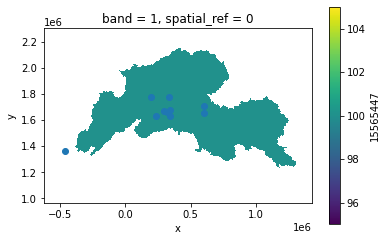

In [10]:
fig, ax = plt.subplots()
upslope['15565447'].plot(ax=ax)
stn.plot(ax=ax)


In [8]:
#watershed data
ctlFile = SMpath+'/watershed/watershed_upslope.ctl'

wd = open_CtlDataset(ctlFile)
#assign spatial reference system
wd = wd.rename({'lon': 'x', 'lat': 'y'})
wd.rio.write_crs(domains[domain]['mod_proj'], inplace=True)
wd

<xarray.Dataset>
Dimensions:      (time: 1, lev: 1, y: 1317, x: 2157)
Coordinates:
  * time         (time) datetime64[ns] 2011-10-01
  * lev          (lev) float64 1.0
  * y            (y) float32 9.85e+05 9.86e+05 9.87e+05 ... 2.3e+06 2.301e+06
  * x            (x) float32 -7.27e+05 -7.26e+05 ... 1.428e+06 1.429e+06
    spatial_ref  int64 0
Data variables:
    dir          (time, lev, y, x) float32 dask.array<chunksize=(1, 1, 1317, 2157), meta=np.ndarray>
    wshed        (time, lev, y, x) float32 dask.array<chunksize=(1, 1, 1317, 2157), meta=np.ndarray>
    order        (time, lev, y, x) float32 dask.array<chunksize=(1, 1, 1317, 2157), meta=np.ndarray>
Attributes:
    comment:  flow direction
    storage:  0
    title:    
    undef:    -9999.0
    pdef:     None

In [9]:
#list of watersheds in hf that lead to station
hfwsdlist = [9945,10072,10055,10011,10048,9932,9956,10040,10052,10045,9961,9977,9999,10003,9980,10001,10005,9951]

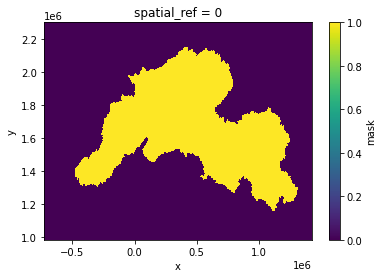

In [10]:
mask=wd.wshed.isel(time=0,lev=0).where(wd.wshed.isin(hfwsdlist),0).squeeze()
mask=mask.where(mask==0,1)
wd['mask'] = mask
wd.mask.plot()

In [12]:
# a step before this notebook in QGIS:
# determine which watershed will be used to calculate the prec cf
#YUKO
stn_list = ['15565447']

### calculate weighted precip correction factor

In [21]:
# start_years_list = list(range(2001,2018))
# end_years_list = list(range(2003,2020))
start_years_list = list(range(int(st_dt[:4])+1,int(ed_dt[:4])))
end_years_list = list(range(int(st_dt[:4])+2,int(ed_dt[:4])+1))



specPs = np.empty([len(start_years_list),len(stn_list)])
specQs = np.empty([len(start_years_list),len(stn_list)])
specETs = np.empty([len(start_years_list),len(stn_list)])
Pcfs = np.empty([len(start_years_list),len(stn_list)])
numpixs = []

# prec data
P = open_CtlDataset(ctlFilePREC)
# P = P.rename({'lon': 'x', 'lat': 'y'})

# open modified et file
ctlFile = SMpath+'ctl_files/wo_assim/etx.ctl'
ET = open_CtlDataset(ctlFile)

for g in range(len(stn_list)):
    #calculate number of pixels in upslope
    numpix = int(wd.mask.where(wd.mask==1).count())
    numpixs.append(numpix)
    #         # calculate upslpe area
    #         wshedA=numpix*1000*1000
    # watershed area area
    wshedA=meta.drain_area_va[meta.site_no==gage].values[0]*2.59e6
    #print('ratio',wshedA/(numpix*1000*1000))
    for y in range(len(start_years_list)):
        styr = start_years_list[y]
        edyr = end_years_list[y]
        print('wy = ',edyr)

        # station name
        gage = stn_list[g]
        print(gage)
        stn = 'USGS:'+gage+':00060:00003'
        # stn Q
        stnQ = Q[stn][str(styr)+'-10-01' :str(edyr)+'-09-30']
        if len(stnQ[stnQ.isnull()])/len(stnQ)>.1:
            print('missing more than 10% of days')
            specPs[y,g]=np.nan
            specQs[y,g]=np.nan
            specETs[y,g]=np.nan
            Pcfs[y,g]=np.nan
            continue
        else:
            # convert stn units of cfs to m^3/d
            stnq = stnQ*60*60*24/35.3147
            # prec data
            p = P.sel(time=slice(str(styr)+'-10-01',str(edyr)+'-09-30'))
            #add upslope mask
            p['mask'] = (['lat', 'lon'],  mask.values)
            # specific precipitation
            psum = p.prec.sum(dim='time')
            specP=np.nansum(psum.where((p.mask==1)&(psum>0)).values)/numpix
            specPs[y,g]=specP
            #et data
            et = ET.sel(time=slice(str(styr)+'-10-01',str(edyr)+'-09-30'))
            #add upslope mask
            et['mask'] = (['lat', 'lon'],  mask.values)
            # specific precipitation
            etsum = et.etx.sum(dim='time')
            specET=np.nansum(etsum.where((et.mask==1)&(etsum>0)).values)/numpix
            specETs[y,g]=specET
            # specific discharge 
            specQ=stnq.sum()/wshedA
            specQs[y,g]=specQ
            # # specific ET
            # et_tot = climatena.et_m.sum(dim='time')
            # specET = et_tot.where(climatena.mask==1).sum().values/numpix
            # specETs[y,g]=specET
            # correction factor 
            Pcfs[y,g]=(specQ+specET)/specP
            # Pcfs[y,g]=specQ/specP
            print('specP',specP)
            print('specQ',specQ)
            print('specET',specET)


wy =  2013
15565447
specP 0.5309803018445451
specQ 0.250966087128538
specET 0.14425981103466268
wy =  2014
15565447
specP 0.633390609280817
specQ 0.28852842359891795
specET 0.19573086992411917
wy =  2015
15565447
specP 0.5960380940907647
specQ 0.24846074427886639
specET 0.1644416002724608
wy =  2016
15565447
specP 0.6663628505245716
specQ 0.29826222366127064
specET 0.20428376608829132
wy =  2017
15565447
specP 0.5702374611870161
specQ 0.2327428488338105
specET 0.1835224617123727
wy =  2018
15565447
specP 0.6366806550411892
specQ 0.2790632015132239
specET 0.18532784667799504


In [115]:
# specific discharge based on stream stats
drainageAkm = 824393.2
drainageAm = drainageAkm*1e6
MAP = 18/39.37 #in to m 
Qdaily_cfs = 230741.7 #[cfs]
Qdaily_cms = 230741.7/35.3147
specq = Qdaily_cms*60*60*24*365/drainageAm
MAP,specq,specq/MAP

(0.4572009144018288, 0.2499440328135791, 0.5466831428817005)

In [22]:
#using etx
# dataframe of stations with correction factors for each year
df = pd.DataFrame(Pcfs,columns = stn_list)
df

,15565447
0,0.744333
1,0.764551
2,0.692745
3,0.754163
4,0.729986
5,0.729394


In [116]:
# without using etx
# dataframe of stations with correction factors for each year
df = pd.DataFrame(Pcfs,columns = stn_list)
df

,15565447
0,1.416925
1,1.246873
2,1.258082
3,1.199721
4,1.287561
5,1.225628


In [31]:
# data frame with mean cfs and weight
newdf = pd.DataFrame(list(zip(stn_list,df.median().values,numpixs)),columns=['stn','cf','numpix'])
# drop stations with nan cf
newdf=newdf[~newdf.cf.isnull()]
newdf['wt']= newdf.numpix/newdf.numpix.sum()
newdf

,stn,cf,numpix,wt
0,15565447,0.737159,828009,1.0


In [28]:
newdf.to_csv(datapath + domain+'_precCF_'+st_dt+'_'+ed_dt+'_cfsv2.csv')

In [29]:
# calculate weighted correction factor
np.nansum(newdf.cf*newdf.wt)

0.7371592061935432

### calc cf for largest watershed

In [44]:
#find station with the largest upslope area
stn_list = meta.site_no.tolist()
count = []
for stn in stn_list:
    count.append(upslope[stn].where(upslope[stn]==100).count().values.tolist())
    
gage = np.array(stn_list)[count==np.max(count)][0]
gage

'15744500'

In [45]:
# et data 
modis['mask'] = upslope[gage]
modis

<xarray.Dataset>
Dimensions:      (wy: 18, y: 798, x: 763)
Coordinates:
  * wy           (wy) int64 2002 2003 2004 2005 2006 ... 2016 2017 2018 2019
  * y            (y) float64 2.158e+06 2.158e+06 ... 1.362e+06 1.362e+06
  * x            (x) float64 -7.435e+05 -7.425e+05 ... 1.75e+04 1.85e+04
    band         int64 1
    spatial_ref  int64 0
Data variables:
    modisET      (wy, y, x) float64 ...
    mask         (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [46]:
#calculate number of pixels in upslope
numpix = int(modis.mask.where(modis.mask==100).count())
# calculate upslpe area
wshedA=int(modis.mask.where(modis.mask==100).count())*1000*1000
numpix,wshedA

(22459, 22459000000)

In [47]:
start_years_list = list(range(int(st_dt[:4]),int(ed_dt[:4])))
end_years_list = list(range(int(st_dt[:4])+1,int(ed_dt[:4])+1))

specPs = []
specQs = []
specETs = []
Pcfs = []

for y in range(len(start_years_list)):
    styr = start_years_list[y]
    edyr = end_years_list[y]
    print(edyr)

    # station name
    stn = stn = 'USGS:'+gage+':00060:00003'
    # stn Q
    stnQ = Q[stn][str(styr+1)+'-09-01' :str(edyr)+'-08-31']
    # convert stn units of cfs to m^3/d
    stnq = stnQ*60*60*24/35.3147
    # prec data
    p = open_CtlDataset(ctlFilePREC)
    #add upslope mask
    p['mask']=(['lat', 'lon'],  np.flipud(upslope[gage].values))
    # specific precipitation
    specP=np.nansum(p.prec.sum(dim='time').where(p.mask==100).values)/numpix
    specPs.append(specP)
    # specific discharge 
    specQ=stnq.sum()/wshedA
    specQs.append(specQ)
    # specific ET
    specET = np.nansum(modis.modisET.sel(wy = edyr).where(modis.mask==100).values)/numpix
    specETs.append(specET)
    # correction factor 
    Pcfs.append(specP/(specQ+specET))

2010
2011
2012
2013
2014


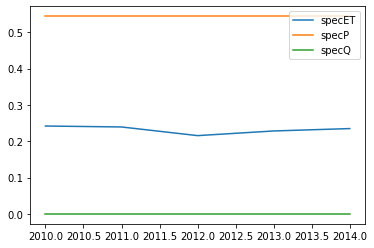

In [48]:
plt.plot(end_years_list,specETs,label ='specET')
plt.plot(end_years_list,specPs,label ='specP')
plt.plot(end_years_list,specQs,label ='specQ')
plt.legend()

In [49]:
# save correction factors 
df = pd.DataFrame(list(zip(end_years_list,Pcfs)),columns = ['wy','cf'])
df

,wy,cf
0,2010,2.248797
1,2011,2.273335
2,2012,2.524710
3,2013,2.382887
4,2014,2.316220


(2.3491896778308075, 2.3162199086237214)

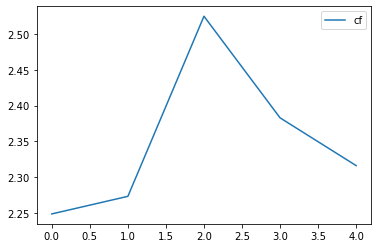

In [50]:
df.cf.plot(label = 'cf',legend=True)
df.cf.mean(),df.cf.median()

In [51]:
df.to_csv(datapath+'prec_cf_wy'+st_dt[:4]+'_'+ed_dt[:4]+'.csv')